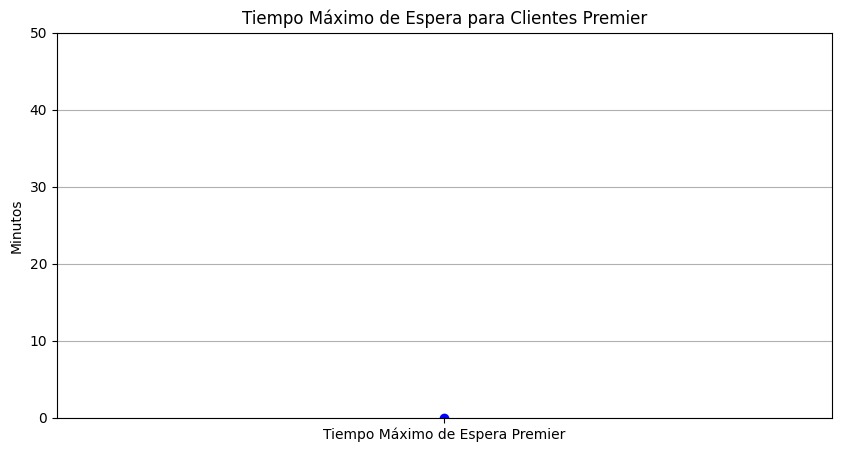

'\n#PREGUNTAS \na)\n\nPodemos notar que al tener 19 clientes y 19 lineas de atencion, el sistema \ninmediatamente pone en linea a los clientes premier porque realmente todos los\nservidores se encuentran en funcionamiento, no hay porque tenerlos en espera.\nPero notemos que conforme vamos incrementando el numero de clientes, el tiempo\nde espera comienza a ser mayor, los cual nos indica que para satisfacer \nde una manera óptima la llegada de clientes y prioritariamente a los premier\nnecesitamos tener mas de 19 lineas de atención, pues como ya se mencionó, entre \nmas clientes lleguen en el lapso del dia, mas será el tiempo de espera.\n\nb) El tiempo estimado maximo de espera para los clientes premier depende de\nla cantidad de lineas que tengamos abiertas, si tenemos las mismas lineas que\nmismos clientes, no se esperan nada, pero se necesitan mas lineas abiertas \nen funcion de que aumente la llegada de los clientes, pues de otra manera al \nmantener solamente 19 lineas, el sistema 

In [1]:
#codigo de Gómez Guzmán Luis Enrique
#importamos todo lo que vamos a necesitar para el codigo
import numpy as np
import random
from random import randint
from enum import Enum
import matplotlib.pyplot as plt



class TipoDeCliente(Enum): #clase para el tipo de cliente usando enum

   Normal = 0
   Premier = 1

class Cliente(): #clase  para el cliente

    def __init__(self, hll, ha, tc):  #constructor inicial
        self.llegada = hll
        self.atencion = ha
        self.tipo_de_cliente = tc

    def __str__(self): #impresion con formato y definimos el condicional
    #para separar a los clientes premier de los normales.
        cadena_de_impresion = ''
        cadena_de_impresion += 'Hora de llegada: ' + str(self.llegada)
        + ' mins, \n'
        cadena_de_impresion += 'Hora de atención: ' + str(self.atencion)
        + ' mins, \n'
        cadena_de_impresion += 'Hora de salida: ' + str(self.salida)
        + ' mins, \n'
        if random.randint(1, 6) == 1:
            self.tipo_de_cliente = TipoDeCliente.Premier
        else:
            self.tipo_de_cliente = TipoDeCliente.Normal
        return cadena_de_impresion

class Cola(): #definimos la clase cola
    def __init__(self): #funcion para almacenar a los clientes en la cola
        self.cola = []

    def entrada(self, elemento): #definir hora de entrada
        self.cola.append(elemento)

    def salida(self): #definir hora de salida
        return self.cola.pop(0) if self.cola else None

class Simulacion(): #clase para la simulacion
    def __init__(self, n_clientes, n_servidores, min_at,
                 max_at, min_inter, max_inter):
      #funcion que recibe los atributos del cliente
        self.cola_prioridad = Cola()
        self.cola_normal = Cola()
        self.numero_de_clientes = n_clientes
        self.numero_de_servidores = n_servidores
        self.minimo_atencion = min_at
        self.maximo_atencion = max_at
        self.minimo_interarribo = min_inter
        self.maximo_interarribo = max_inter
        self.tiempo_de_espera_premier = []
        self.tiempo_servidores = [0] * n_servidores

    def generar_clientes(self):
      #funcion para generar los clientes, teniendo tiempos de
      #interaaribo y definir el tipo de cliente
        reloj = 0
        for i in range(self.numero_de_clientes):
            interarribo = random.randint(self.minimo_interarribo,
                                         self.maximo_interarribo)
            reloj += interarribo
            tiempo_de_atencion = random.randint(self.minimo_atencion,
                                                self.maximo_atencion)
            tipo_de_cliente = (
                TipoDeCliente.Premier if
                random.randint(1, 6) == 1 else TipoDeCliente.Normal)
            cliente = Cliente(reloj, tiempo_de_atencion, tipo_de_cliente)

            if tipo_de_cliente == TipoDeCliente.Premier:
                self.cola_prioridad.entrada(cliente)
            else:
                self.cola_normal.entrada(cliente)

    def simular_atencion(self):
      #funcion en la que utilizamos el ciclo for para atender prioritaramente a
      #los clientes premier, en segunda prioridad atender
      #a los clientes normales
        for i in range(self.numero_de_clientes):
            for j in range(self.numero_de_servidores):
                if self.cola_prioridad.cola:
                    cliente = self.cola_prioridad.cola[0]
                    if self.tiempo_servidores[j] <= cliente.llegada:
                        cliente = self.cola_prioridad.salida()
                        self.tiempo_servidores[j] = (
                            max(self.tiempo_servidores[j], cliente.llegada)
                            + cliente.atencion)
                        break

                if self.cola_normal.cola:
                    cliente = self.cola_normal.cola[0]
                    if self.tiempo_servidores[j] <= cliente.llegada:
                        cliente = self.cola_normal.salida()
                        self.tiempo_servidores[j] = (
                            max(self.tiempo_servidores[j], cliente.llegada)
                             + cliente.atencion)
                        break

    def resultados(self):
      #funcion resultados, definimos los datos con la informacion obtenida
      #de la hora de llegada, salida, y el tiempo que estuvo en servidores
        for j in range(self.numero_de_servidores):
            while (self.cola_prioridad.cola and
                   self.tiempo_servidores[j] >
                   self.cola_prioridad.cola[0].llegada):
                cliente = self.cola_prioridad.salida()
                self.tiempo_de_espera_premier.append(self.tiempo_servidores[j]
                                                     - cliente.llegada)

            while (self.cola_normal.cola and
                   self.tiempo_servidores[j] >
                   self.cola_normal.cola[0].llegada):
                cliente = self.cola_normal.salida()
                self.tiempo_de_espera_premier.append(self.tiempo_servidores[j]
                                                     - cliente.llegada)

        maximo_atencion_premier = (
            max(self.tiempo_de_espera_premier)
            if self.tiempo_de_espera_premier else 0
        )
        return maximo_atencion_premier

def graficar_resultados(tiempo_maximo_premier):
  #con esta funcion graficamos los resultados
    plt.figure(figsize=(10, 5))
    plt.plot(['Tiempo Máximo de Espera Premier'], [tiempo_maximo_premier],
             marker='o', color='blue')
    plt.ylabel('Minutos')
    plt.title('Tiempo Máximo de Espera para Clientes Premier')
    plt.ylim(0, tiempo_maximo_premier + 50)
    plt.grid(axis='y')
    plt.show()

#implemetacion del metodo main
if __name__ == "__main__":
    simulacion = Simulacion(
        n_clientes=19,
        n_servidores=19,
        min_at=1,
        max_at=81,
        min_inter=1,
        max_inter=3
    )

    simulacion.generar_clientes()
    simulacion.simular_atencion()
    tiempo_maximo_premier = simulacion.resultados()
    graficar_resultados(tiempo_maximo_premier)

"""
#PREGUNTAS
a)

Podemos notar que al tener 19 clientes y 19 lineas de atencion, el sistema
inmediatamente pone en linea a los clientes premier porque realmente todos los
servidores se encuentran en funcionamiento, no hay porque tenerlos en espera.
Pero notemos que conforme vamos incrementando el numero de clientes, el tiempo
de espera comienza a ser mayor, los cual nos indica que para satisfacer
de una manera óptima la llegada de clientes y prioritariamente a los premier
necesitamos tener mas de 19 lineas de atención, pues como ya se mencionó, entre
mas clientes lleguen en el lapso del dia, mas será el tiempo de espera.

b) El tiempo estimado maximo de espera para los clientes premier depende de
la cantidad de lineas que tengamos abiertas, si tenemos las mismas lineas que
mismos clientes, no se esperan nada, pero se necesitan mas lineas abiertas
en funcion de que aumente la llegada de los clientes, pues de otra manera al
mantener solamente 19 lineas, el sistema se satura.
"""